In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
import matplotlib as mpl

mpl.rcParams['font.family'] = 'AppleGothic'
mpl.rcParams['axes.unicode_minus'] = False

In [9]:
# 1. 1000명의 학생이 5과목 시험을 본 데이터를 생성하고 다음을 구하시오

n_students = 1000
subjects = ['국어', '수학', '영어', '사회', '과학']

df = pd.DataFrame({
    '학번': range(1, n_students+1),
    '국어': np.random.normal(70, 15, n_students),
    '수학': np.random.normal(70, 15, n_students),
    '영어': np.random.normal(70, 15, n_students),
    '사회': np.random.normal(70, 15, n_students),
    '과학': np.random.normal(70, 15, n_students),
})

df.head()

,학번,국어,수학,영어,사회,과학
0,1,69.572593,46.814625,65.347620,76.443427,45.473677
1,2,71.724479,61.011870,80.321172,100.133058,70.855785
2,3,72.681112,49.352843,51.730216,70.610554,73.193907
3,4,87.941781,63.343812,65.975913,43.210410,95.395910
4,5,86.818359,69.533205,73.346277,52.858077,84.891979


In [8]:
## 1-1. 각 과목의 평균과 표준편차
for sub in subjects:
    print(sub + f" 과목의 평균: {df[sub].mean():.2f}" + f" 표준편차: {df[sub].std():.2f}");

국어 과목의 평균: 69.62 표준편차: 14.98
수학 과목의 평균: 69.94 표준편차: 15.04
영어 과목의 평균: 69.80 표준편차: 14.50
사회 과목의 평균: 71.02 표준편차: 15.28
과학 과목의 평균: 70.47 표준편차: 15.12


In [18]:
## 1-2. 5과목 평균이 80점 이상이인 학생 수

mask = (df[subjects].mean(axis=1) >= 80)
print(mask.sum())

68


In [37]:
## 1-3. 모든 과목에서 60점 이상을 받은 학생 수

mask = df[subjects] >= 60
count = (mask.sum(axis=1) == 5).sum()
print(count)

        국어     수학     영어     사회     과학
0     True  False   True   True  False
1     True   True   True   True   True
2     True  False  False   True   True
3     True   True   True  False   True
4     True   True   True  False   True
..     ...    ...    ...    ...    ...
995   True   True   True   True   True
996   True   True   True   True  False
997   True  False  False   True  False
998   True   True  False   True   True
999  False   True  False   True   True

[1000 rows x 5 columns]
223


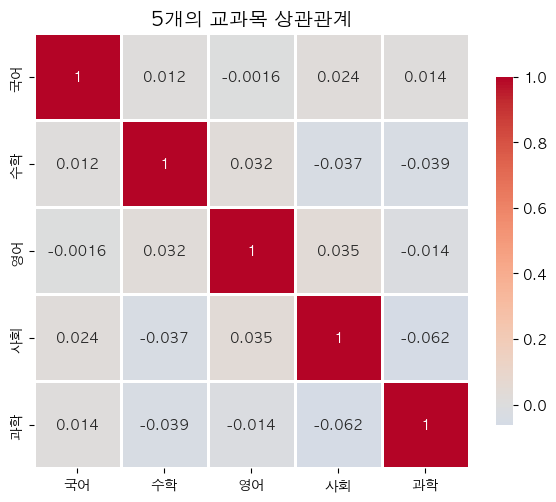

In [40]:
df_corr = df[subjects]

corr_matrix = df_corr.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title(f'5개의 교과목 상관관계', fontsize=14)
plt.tight_layout()
plt.show()